## Introduction to Pandas

Pandas is a framework specifically designed to ease the work with data. Effectively, you have optimized data structures and functions for data
- exploration
- manipulation
- filtering
- preprocessing
- cleaning
- visualization
- and for statistical calculation 

Examples are always helpful:

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import re

### Data Structures

The Series data structure:

In [2]:
example = [1, 2, 3, 4, 5]# create list
ser = pd.Series(example)# create series from list
ser.head()# print out

0    1
1    2
2    3
3    4
4    5
dtype: int64

The Series data structure is an indexed array and comes along with a data type.

In [3]:
example_2 = [1, 'data', (1,2), 5]# mixed data types 
ser2 = pd.Series(example_2)# create series from list
ser2.head()# print out

0         1
1      data
2    (1, 2)
3         5
dtype: object

In [4]:
ser3 = pd.Series([1, float('NaN'), 3], index=['x', 11, 'z']) # NaN --> not a number
ser3.head()

x     1.0
11    NaN
z     3.0
dtype: float64

In [5]:
ser3.reset_index(drop=True)# get it 'right'

0    1.0
1    NaN
2    3.0
dtype: float64

In [6]:
data = {'column_a': [3, 2, 1, 0], 'column_b': ['a', 'b', 'c', 'd']}
df = pd.DataFrame.from_dict(data)

df.head()

,column_a,column_b
0,3,a
1,2,b
2,1,c
3,0,d


In [7]:
df['column_c'] = [1.0, 2.0, 3.0, 4.0]
df.head()

,column_a,column_b,column_c
0,3,a,1.0
1,2,b,2.0
2,1,c,3.0
3,0,d,4.0


In [8]:
df_news = pd.read_csv('../data/articles1.csv')
df_news.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [9]:
df_news.columns

Index(['Unnamed: 0', 'id', 'title', 'publication', 'author', 'date', 'year',
       'month', 'url', 'content'],
      dtype='object')

In [10]:
df_news.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
df_news

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
...,...,...,...,...,...,...,...,...,...
49995,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...


In [12]:
df_news.head()

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [13]:
df_news.year.astype(int)

0        2016
1        2017
2        2017
3        2017
4        2017
         ... 
49995    2017
49996    2017
49997    2017
49998    2017
49999    2017
Name: year, Length: 50000, dtype: int64

In [14]:
df_news.month.astype(int)

0        12
1         6
2         1
3         4
4         1
         ..
49995     1
49996     1
49997     1
49998     1
49999     1
Name: month, Length: 50000, dtype: int64

In [15]:
pd.to_datetime(df_news['date'])

0       2016-12-31
1       2017-06-19
2       2017-01-06
3       2017-04-10
4       2017-01-02
           ...    
49995   2017-01-11
49996   2017-01-11
49997   2017-01-11
49998   2017-01-11
49999   2017-01-11
Name: date, Length: 50000, dtype: datetime64[ns]

In [16]:
df_news.tail()

,id,title,publication,author,date,year,month,url,content
49995,73465,"Rex Tillerson Says Climate Change Is Real, but …",Atlantic,Robinson Meyer,2017-01-11,2017.0,1.0,NaN,"As chairman and CEO of ExxonMobil, Rex Tillers..."
49996,73466,The Biggest Intelligence Questions Raised by t...,Atlantic,Amy Zegart,2017-01-11,2017.0,1.0,NaN,I’ve spent nearly 20 years looking at intellig...
49997,73467,Trump Announces Plan That Does Little to Resol...,Atlantic,Jeremy Venook,2017-01-11,2017.0,1.0,NaN,Donald Trump will not be taking necessary st...
49998,73468,Dozens of For-Profit Colleges Could Soon Close,Atlantic,Emily DeRuy,2017-01-11,2017.0,1.0,NaN,Dozens of colleges could be forced to close ...
49999,73469,The Milky Way’s Stolen Stars,Atlantic,Marina Koren,2017-01-11,2017.0,1.0,NaN,The force of gravity can be described using a ...


In [17]:
df_news.shape

(50000, 9)

In [18]:
df_news['title']

0        House Republicans Fret About Winning Their Hea...
1        Rift Between Officers and Residents as Killing...
2        Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...
3        Among Deaths in 2016, a Heavy Toll in Pop Musi...
4        Kim Jong-un Says North Korea Is Preparing to T...
                               ...                        
49995     Rex Tillerson Says Climate Change Is Real, but …
49996    The Biggest Intelligence Questions Raised by t...
49997    Trump Announces Plan That Does Little to Resol...
49998      Dozens of For-Profit Colleges Could Soon Close 
49999                         The Milky Way’s Stolen Stars
Name: title, Length: 50000, dtype: object

In [19]:
df_news[['title','author']]

,title,author
0,House Republicans Fret About Winning Their Hea...,Carl Hulse
1,Rift Between Officers and Residents as Killing...,Benjamin Mueller and Al Baker
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",Margalit Fox
3,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",William McDonald
4,Kim Jong-un Says North Korea Is Preparing to T...,Choe Sang-Hun
...,...,...
49995,"Rex Tillerson Says Climate Change Is Real, but …",Robinson Meyer
49996,The Biggest Intelligence Questions Raised by t...,Amy Zegart
49997,Trump Announces Plan That Does Little to Resol...,Jeremy Venook
49998,Dozens of For-Profit Colleges Could Soon Close,Emily DeRuy


In [20]:
df_news.iloc[0]

id                                                         17283
title          House Republicans Fret About Winning Their Hea...
publication                                       New York Times
author                                                Carl Hulse
date                                                  2016-12-31
year                                                        2016
month                                                         12
url                                                          NaN
content        WASHINGTON  —   Congressional Republicans have...
Name: 0, dtype: object

In [21]:
df_news.iloc[0,1:3]

title          House Republicans Fret About Winning Their Hea...
publication                                       New York Times
Name: 0, dtype: object

In [22]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  float64
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.4+ MB


In [23]:
df_news.describe()

,id,year,month,url
count,50000.000000,50000.000000,50000.000000,0.0
mean,44432.454800,2016.273700,5.508940,NaN
std,15773.615179,0.634694,3.333062,NaN
min,17283.000000,2011.000000,1.000000,NaN
25%,31236.750000,2016.000000,3.000000,NaN
50%,43757.500000,2016.000000,5.000000,NaN
75%,57479.250000,2017.000000,8.000000,NaN
max,73469.000000,2017.000000,12.000000,NaN


In [24]:
df_news.year.value_counts()

2016.0    28451
2017.0    17908
2015.0     3326
2013.0      212
2014.0       76
2012.0       26
2011.0        1
Name: year, dtype: int64

### Filter, Sort, and Groupby

In [25]:
df_news[(df_news['year'] > 2015) & (df_news['year'] < 2016.1)]

,id,title,publication,author,date,year,month,url,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...
2533,20113,"Clinton, Sanders and the Crowd Bring the Noise...",New York Times,James Poniewozik,2016-04-16,2016.0,4.0,NaN,"Thursday night, Democrats did what party peopl..."
2534,20114,Yahoo’s Suitors Uncover Few Financial Details ...,New York Times,Vindu Goel and Michael J. de la Merced,2016-04-18,2016.0,4.0,NaN,SAN FRANCISCO — As Yahoo prepares to accept...
...,...,...,...,...,...,...,...,...,...
49847,73224,Will the Alabama Crimson Tide Keep Rolling?,Atlantic,Robert O'Connell,2016-12-30,2016.0,12.0,NaN,"Minutes into an game against Texas AM, the U..."
49848,73225,Embracing an Ordinary Economy,Atlantic,Alexia Fernández Campbell,2016-12-30,2016.0,12.0,NaN,"In the past half century, many politicians hav..."
49849,73226,2016: A Year Defined by America’s Diverging Ec...,Atlantic,Annie Lowrey,2016-12-30,2016.0,12.0,NaN,"In many ways, 2016 has been the strongest year..."
49850,73227,The Year in Religion and Politics,Atlantic,Candice Norwood,2016-12-30,2016.0,12.0,NaN,"Every December, The Atlantic looks back on the..."


In [26]:
df_news.publication.unique()

array(['New York Times', 'Breitbart', 'CNN', 'Business Insider',
       'Atlantic'], dtype=object)

In [27]:
print(df_news.groupby('publication').groups['CNN'])

Int64Index([31584, 31585, 31586, 31587, 31588, 31589, 31590, 31591, 31592,
            31593,
            ...
            43062, 43063, 43064, 43065, 43066, 43067, 43068, 43069, 43070,
            43071],
           dtype='int64', length=11488)


In [28]:
print(df_news.groupby('publication')['month'].agg(np.mean))

publication
Atlantic            2.479532
Breitbart           5.458223
Business Insider    5.503034
CNN                 5.741905
New York Times      5.392029
Name: month, dtype: float64


In [29]:
df_news.year = df_news.year.astype(int)

In [30]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  int64  
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.4+ MB


In [31]:
pd.to_datetime(df_news['date'], errors='coerce').isnull().value_counts()

False    50000
Name: date, dtype: int64

In [32]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           50000 non-null  int64  
 1   title        50000 non-null  object 
 2   publication  50000 non-null  object 
 3   author       43694 non-null  object 
 4   date         50000 non-null  object 
 5   year         50000 non-null  int64  
 6   month        50000 non-null  float64
 7   url          0 non-null      float64
 8   content      50000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.4+ MB


In [33]:
df_news.count()

id             50000
title          50000
publication    50000
author         43694
date           50000
year           50000
month          50000
url                0
content        50000
dtype: int64

In [34]:
df_news.author[:10]

0                       Carl Hulse
1    Benjamin Mueller and Al Baker
2                     Margalit Fox
3                 William McDonald
4                    Choe Sang-Hun
5                      Sewell Chan
6              Javier C. Hernández
7                      Gina Kolata
8                 Katherine Rosman
9                      Andy Newman
Name: author, dtype: object

In [35]:
df_news.groupby('author').agg(np.size)

,id,title,publication,date,year,month,url,content
author,,,,,,,,
,1,1,1,1,1,1.0,1.0,1
<strong>Amanda Davies</strong>,1,1,1,1,1,1.0,1.0,1
AJ Willingham,1,1,1,1,1,1.0,1.0,1
Alexandra King,3,3,3,3,3,3.0,3.0,3
Alisha Haridasani,1,1,1,1,1,1.0,1.0,1
...,...,...,...,...,...,...,...,...
Zahra Nader and Rod Nordland,1,1,1,1,1,1.0,1.0,1
Zahra Ullah,1,1,1,1,1,1.0,1.0,1
Zia ur-Rehman and Salman Masood,1,1,1,1,1,1.0,1.0,1


## Data Wrangling in Pandas

The most efficient and popular way to store data/information in a tabular fashion is by utilizing the __pandas__ framework which has been spcifically designed for this task:

-    provides a clear and very readable way to present data in a tabular structure
-    comes along with routines to access and manipulate data
-    is an established package in the data science domain 
-    works well with other packages such as __numpy__

### Task: Remove stop words from text 

Stop words are extremely common words which have little or almost no semantic value to us, i.e. when analyzing texts, we would be able to understand the content of a chapter or an article even when all these words are completely removed from the corpus. 
Examples are:
- this
- that
- in
- at
- with 
- etc.

Be careful: This depends on the case and is very much sensitive to the task. A phrase like 'flights to New York City' loses its meaning it the stopword 'to' is dropped!

In [36]:
# TASK: remove the stopwords from the article in the variable text
# For the given text and stopwords write a function removing all stopwords
# See if you are able to still process the text and understand its meaning
# SUBTASK: add your own stopwords, to better understand the article

## input: str, output: list of str with stopwords removed 

df = pd.read_csv('../data/bbc_data_raw.csv')
text = df['art_body'][10]
re.sub(r'[^\w]', ' ', text)

stopwords = ['in', 'on', 'at', 'this', 'that']


list_without_stopwords = []

# your code

In [37]:
print (list_without_stopwords)

[]


In [38]:
#solution

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

/Users/thomas/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
tmpData = df_news.groupby(['publication', 'month']).count().reset_index()

In [41]:
tmpData

,publication,month,id,title,author,date,year,url,content
0,Atlantic,1.0,148,148,148,148,148,0,148
1,Atlantic,12.0,23,23,23,23,23,0,23
2,Breitbart,1.0,2760,2760,2760,2760,2760,0,2760
3,Breitbart,2.0,2578,2578,2578,2578,2578,0,2578
4,Breitbart,3.0,2837,2837,2837,2837,2837,0,2837
5,Breitbart,4.0,2659,2659,2659,2659,2659,0,2659
6,Breitbart,5.0,2638,2638,2638,2638,2638,0,2638
7,Breitbart,6.0,2266,2266,2266,2266,2266,0,2266
8,Breitbart,7.0,1391,1391,1391,1391,1391,0,1391
9,Breitbart,8.0,1409,1409,1409,1409,1409,0,1409


[Text(0, 0, 'Atlantic'),
 Text(0, 0, 'Breitbart'),
 Text(0, 0, 'Business Insider'),
 Text(0, 0, 'CNN'),
 Text(0, 0, 'New York Times')]

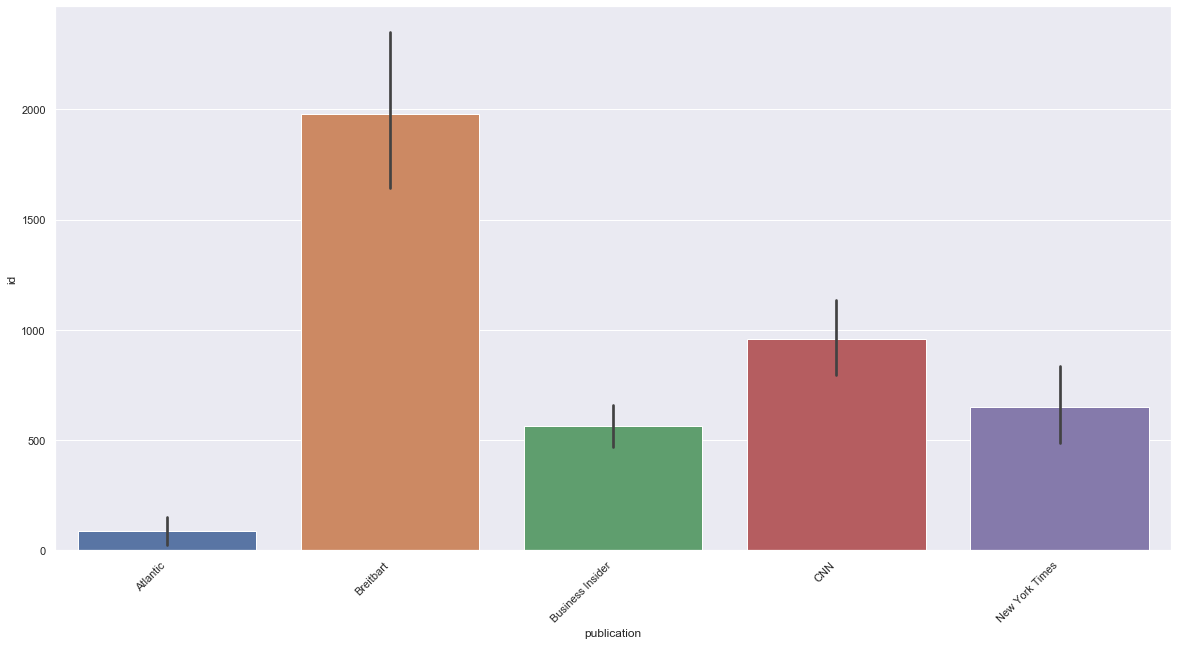

In [42]:
plt.figure(figsize=(20,10))
stateTotalsChart = sns.barplot(data=tmpData, x='publication',y='id')
stateTotalsChart.set_xticklabels(stateTotalsChart.get_xticklabels(), rotation=45, horizontalalignment='right')

In [43]:
y = list(tmpData.month)

In [44]:
yBB = tmpData[tmpData['publication'] == 'Breitbart']
yBB

,publication,month,id,title,author,date,year,url,content
2,Breitbart,1.0,2760,2760,2760,2760,2760,0,2760
3,Breitbart,2.0,2578,2578,2578,2578,2578,0,2578
4,Breitbart,3.0,2837,2837,2837,2837,2837,0,2837
5,Breitbart,4.0,2659,2659,2659,2659,2659,0,2659
6,Breitbart,5.0,2638,2638,2638,2638,2638,0,2638
7,Breitbart,6.0,2266,2266,2266,2266,2266,0,2266
8,Breitbart,7.0,1391,1391,1391,1391,1391,0,1391
9,Breitbart,8.0,1409,1409,1409,1409,1409,0,1409
10,Breitbart,9.0,1412,1412,1412,1412,1412,0,1412
11,Breitbart,10.0,1253,1253,1253,1253,1253,0,1253
